In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

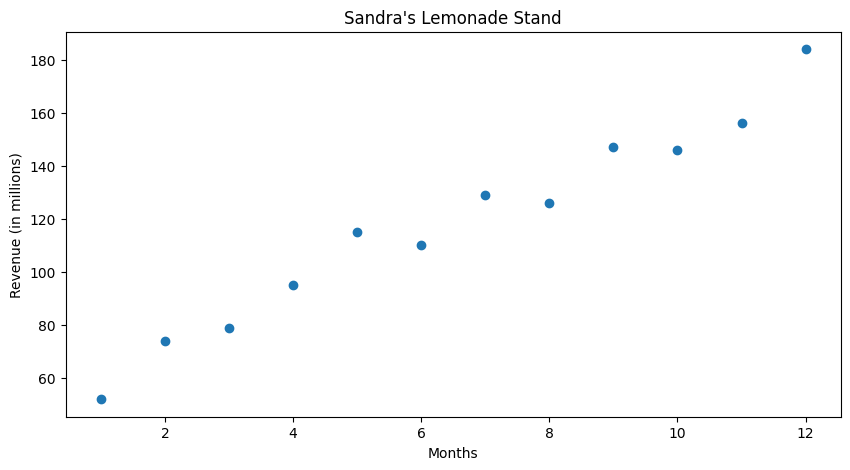

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter(months, revenue)
plt.title("Sandra's Lemonade Stand")
plt.xlabel('Months')
plt.ylabel('Revenue (in millions)')
plt.show()

# Points and Lines

Formula for a line: $y = mx + b$

In [4]:
# Slope
m = 10.5
# Intercept
b = 48

y = [m * x + b for x in months]

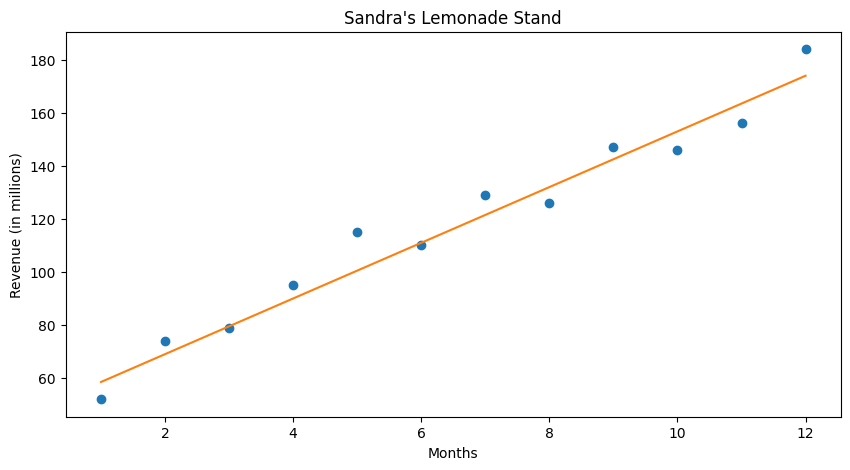

In [5]:
plt.figure(figsize=(10, 5))

plt.plot(months, revenue, 'o')
plt.plot(months, y)
plt.title("Sandra's Lemonade Stand")
plt.xlabel('Months')
plt.ylabel('Revenue (in millions)')
plt.show()

# Loss

In [6]:
x = [1, 2, 3]
y = [5, 1, 3]

In [7]:
#y = 1x + 0
m1 = 1
b1 = 0

y_predicted1 = [ x1 * m1 + b1 for x1 in x]


total_loss1 = 0

for i in range(len(y)):
  total_loss1 += (y_predicted1[i] - y[i]) ** 2

In [8]:
#y = 0.5x + 1
m2 = 0.5
b2 = 1

y_predicted2 = [ x * m2 + b2 for x in x]

total_loss2 = 0

for i in range(len(y)):
  total_loss2 += (y_predicted2[i] - y[i]) ** 2

In [9]:
print(f'Loss 1: {total_loss1}')
print(f'Loss 2: {total_loss2}')

Loss 1: 17
Loss 2: 13.5


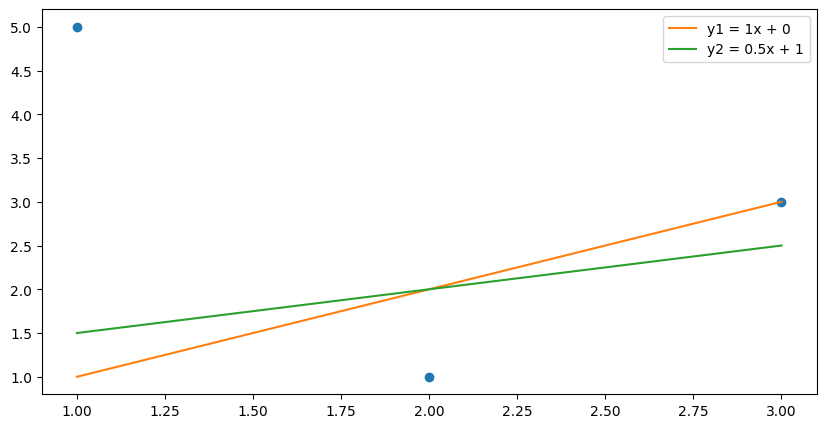

In [10]:
plt.figure(figsize=(10, 5))

plt.plot(x, y, 'o')
plt.plot(x, y_predicted1, label='y1 = 1x + 0')
plt.plot(x, y_predicted2, label='y2 = 0.5x + 1')
plt.legend()
plt.show()

# Gradient Descent for Intercept and Slope

Formule for the gradient descent intercept: $-\frac{2}{N}\sum_{i=1}^N(y_i - (mx_i + b))$ 

O 

$\frac{1}{N}\sum_{i=1}^N((mx_i + b) - y_i)$

In [11]:
def get_gradient_at_b(x, y, m, b):
    diff = 0

    for i in range(len(x)):
        y_val = y[i]
        x_val = x[i]
        # diff += (((m * x_val) + b) - y_val)
        diff += (y_val - ((m * x_val) + b))

    b_gradient = -2/len(x) * diff
    # b_gradient = 1 / len(x) * diff

    return b_gradient

Formule for the gradient descent slope: $\frac{1}{N}\sum_{i=1}^Nx_i((mx_i + b) - y_i)$

OR 

$-\frac{2}{N}\sum_{i=1}^Nx_i(y_i - (mx_i + b))$

In [12]:
def get_gradient_at_m(x, y, m, b):
    diff = 0

    for i in range(len(x)):
        y_val = y[i]
        x_val = x[i]
        # diff += x_val * (((m * x_val) + b) - y_val)
        diff += x_val * (y_val - ((m * x_val) + b))

    m_gradient = -2/len(x) * diff
    # m_gradient = 1 / len(x) * diff

    return m_gradient

Ahora que sabemos cómo calcular el gradiente, queremos dar un "step" en esa dirección. Sin embargo, es importante pensar si ese paso es demasiado grande o demasiado pequeño. ¡No queremos sobrepasar el error mínimo!

Podemos escalar el tamaño del paso multiplicando el gradiente por una tasa de aprendizaje .

Para encontrar un nuevo `bvalor`, diríamos:


```
new_b = current_b - (learning_rate * b_gradient)
```

donde current_bestá nuestra suposición de cuál `b` es el valor, `b_gradientes` el gradiente de la curva de pérdida en nuestra suposición actual y `learning_ratees` proporcional al tamaño del paso que queremos dar.

In [13]:
def step_gradient(x, y, b_current, m_current, learning_rate):
    b_gradient = get_gradient_at_b(x, y, m_current, b_current)
    m_gradient = get_gradient_at_m(x, y, m_current, b_current)

    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)

    return [b, m]

In [14]:
# current intercept guess:
b = 0
# current slope guess:
m = 0

# Call your function here to update b and m
b, m = step_gradient(months, revenue, b, m, 0.01)

print(b, m)

2.355 17.78333333333333


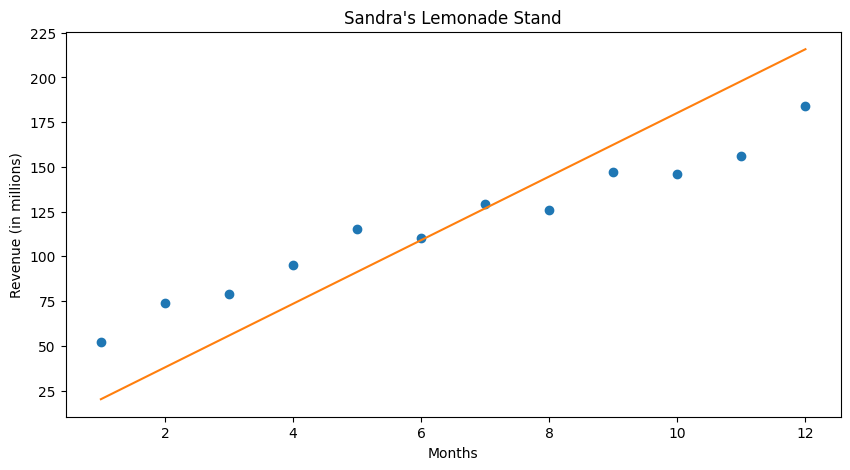

In [15]:
plt.figure(figsize=(10, 5))

plt.plot(months, revenue, 'o')
plt.plot(months, [m * x + b for x in months])
plt.title("Sandra's Lemonade Stand")
plt.xlabel('Months')
plt.ylabel('Revenue (in millions)')
plt.show()

In [16]:
def gradient_descent(x, y, learning_rate, num_iterations):
    b = 0
    m = 0

    for i in range(num_iterations):
        b, m = step_gradient(x, y, b, m, learning_rate)

    return b, m

In [17]:
b, m = gradient_descent(months, revenue, 0.01, 1000)
print(f'b: {b}, m: {m}')

b: 49.60215351339813, m: 10.463427732364998


In [18]:
y = [m * x + b for x in months]

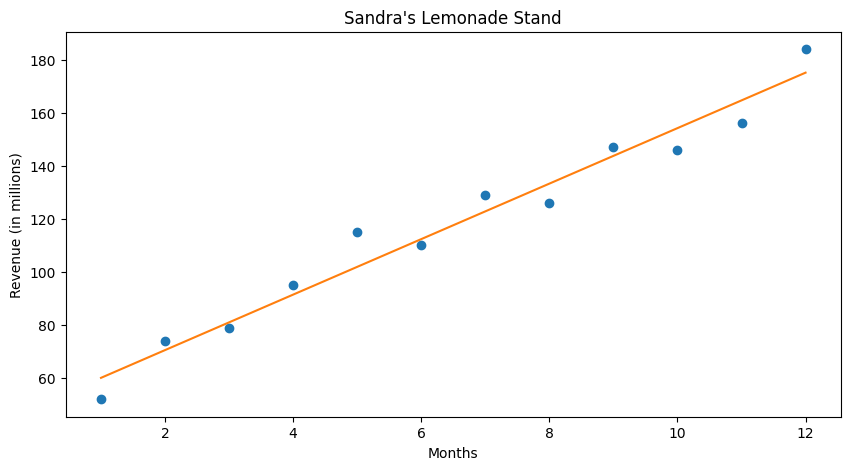

In [19]:
plt.figure(figsize=(10, 5))

plt.plot(months, revenue, 'o')
plt.plot(months, y)
plt.title("Sandra's Lemonade Stand")
plt.xlabel('Months')
plt.ylabel('Revenue (in millions)')
plt.show()

# Use Your Functions on Real Data

In [20]:
df = pd.read_csv('../../data/heights.csv')
df.head()

,height,weight
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


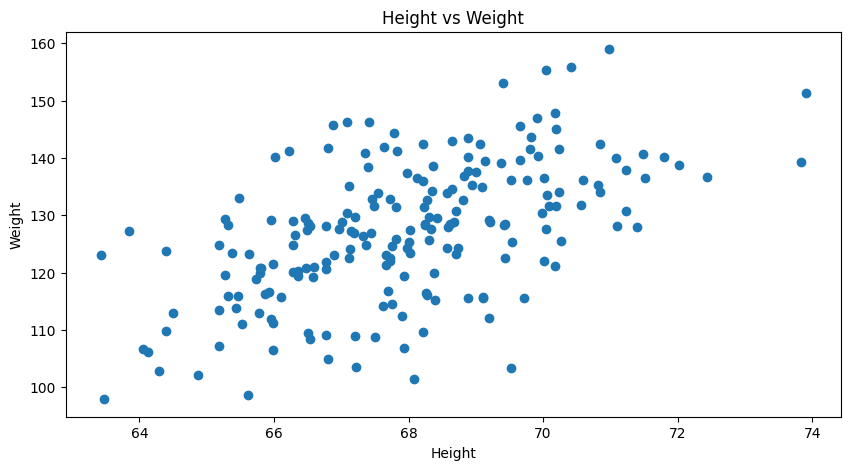

In [21]:
x = df['height']
y = df['weight']

plt.figure(figsize=(10, 5))

plt.plot(x, y, 'o')
plt.title("Height vs Weight")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [22]:
b, m = gradient_descent(x, y, 0.0001, 1000)

y_predicted = [m * x + b for x in x]

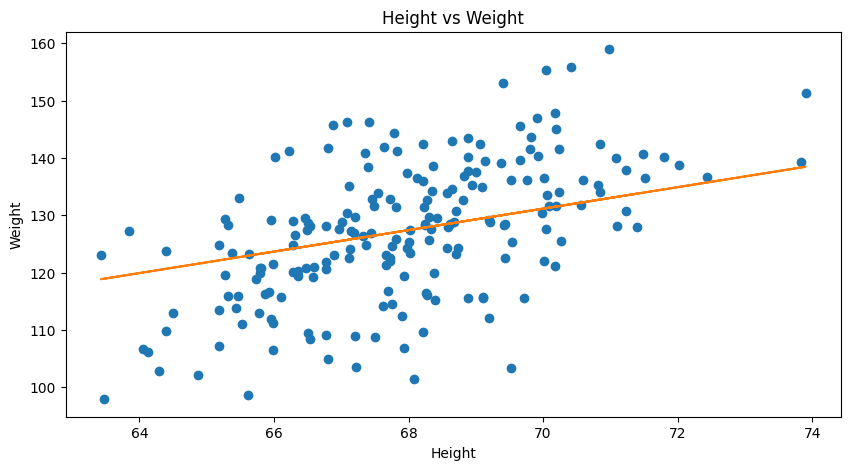

In [23]:
plt.figure(figsize=(10, 5))

plt.plot(x, y, 'o')
plt.plot(x, y_predicted)
plt.title("Height vs Weight")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()


In [24]:
print(f'Slope: {m}')
print(f'Intercept: {b}')

Slope: 1.8734057026069746
Intercept: 0.010353680606197567
